# Studi Kasus Madaline (Madaline untuk Pengenalan Citra)

Anda sedang membuat sistem pengenalan digit dari sebuah tulisan tangan. Karena sistem yang cukup kompleks anda menggunakan algoritma Madaline. Untuk menyelesaikan permasalahan ini, anda menggunakan dataset MNIST

# Data Loading & Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)



In [2]:
!gdown 1bf6GJcubajKS1MpgQe_dRLyST8TwBsay

df = pd.read_csv('data_lite.csv')

Downloading...
From: https://drive.google.com/uc?id=1bf6GJcubajKS1MpgQe_dRLyST8TwBsay
To: /content/data_lite.csv
100% 3.82M/3.82M [00:00<00:00, 74.8MB/s]


In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-5-9b127e69fa70>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kelas = row[0]  # Kolom pertama adalah nama kelas


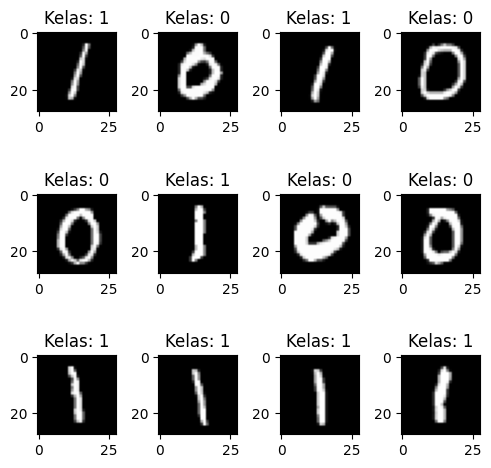

In [5]:
selected = df.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
X = np.array([image.flatten() for image in X.values])
y = df['label']
y = np.array([image.flatten() for image in y.values])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Implementasi Adaline

Dari data diatas, buatlah sebuah model Adaline untuk mengklasifikasikan dataset iris. Untuk pengujian perceptron dapat menggunakan dari studi kasus sebelumnya.

In [21]:
def aktivasi(x):
  if x < 0:
    return -1
  else:
    return 1

In [22]:
def train(train_data, train_target, alpha=0.1, max_epoch=10):
  w = np.random.random((784,))
  v = np.array([0.5, 0.5])
  b = np.random.random(2)
  b = np.append(b, 0.5)
  epoch = 0
  v_aktivasi = np.vectorize(aktivasi)
  weight_updated = True
  while weight_updated == True and epoch < max_epoch:
    weight_updated = False

  for data,target in zip(train_data,train_target):
    z_in = np.dot(data,w)
    z_in = z_in + b[:-1]
    z = v_aktivasi(z_in)
    y_in = np.dot(z,v) + b[-1]
    y = v_aktivasi(y_in)

    if y != target:
      weight_updated = True
      if target == 1:
        index = np.argmin(np.abs(z_in))
        b[index] = b[index] + alpha * (1 - z_in[index])
        w[:, index] = w[:, index] + alpha * (1 - z_in[index])*data
      elif target == -1:
        index = np.where(z_in>0)[0]
        if len(index)==1:
          index = index[0]
        b[index] = b[index] + alpha * (-1 - z_in[index])
        w[:, index] = w[:, index] + alpha * (-1 - z_in[index]) * data

  epoch = epoch + 1

  return (w,v,b)

In [34]:
def test(w,v,b,test_data):
  v_aktivasi = np.vectorize(aktivasi)
  outputs = []

  for data in test_data:
    z_in = np.dot(data, w)
    z_in = z_in + b[:-1]
    z = v_aktivasi(z_in)
    y_in = np.dot(z, v) + b[-1]
    y = v_aktivasi(y_in)
    outputs.append(y)

  return np.array(outputs)

In [30]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

  return sum(s) / len(a)

In [37]:
(w, v, b) = train(X_train, y_train, alpha=0.2, max_epoch=10)
output = test(w, v, b, X_train)
accuracy = calc_accuracy(output, y_train)

print('output:', output)
print('target:', y_test)
print('accuracy:', accuracy)

output: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

## Analisis

1. Apakah Madaline mampu membedakan antara kedua digit? Jelaskan!
2. Jelaskan tantangan dari data citra digit yang diberikan!
3. Apakah ada preprocessing pada data citra yang dapat dilakukan agar model dapat bekerja dengan lebih baik?

Jawab

1. Karena Madaline hanya bisa menyelesaikan persamaan linear sehingga untuk membedakan antara kegua digit, dimana tiap data digit memiliki ukuran, orientasi, dan posisi yang cukup berbeda beda sehingga data tersebut memiliki kompleksitas tinggi yang cukup sulit diselesaikan dengan Madaline.
2. Data tersebut memiliki ukuran, orientasi, dan posisi yang cukup berbeda beda sehingga data tersebut memiliki kompleksitas tinggi yang cukup sulit diselesaikan dengan Madaline.
3. Mungkin bisa dilakukan transformasi data, namun hasil masih akan kurang baik karena Madaline memang kurang bisa menyelesaikan permasalahan tersebut.